In [257]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [258]:
data=pl.read_csv("CarPrice_Assignment.csv").drop(["car_ID","CarName"])
data

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
1,"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
2,"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
2,"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,2952,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,9.5,114,5400,23,28,16845.0
-1,"""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.8,55.5,3049,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,8.7,160,5300,19,25,19045.0
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,3012,"""ohcv""","""six""",173,"""mpfi""",3.58,2.87,8.8,134,5500,18,23,21485.0


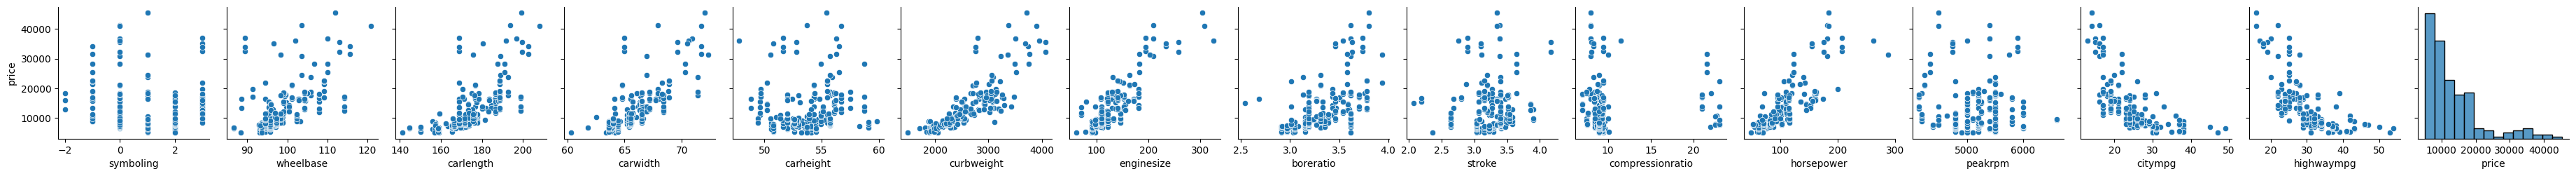

In [259]:
sns.pairplot(data.to_pandas(),y_vars=["price"])

Cutting target col to make it less right Skewed

In [260]:
data=data.filter(data["price"]<20000)
data.shape

(179, 24)

Check for Linearity between independent variables and dependent variable

Missing Values

In [261]:
data.null_count().sum()

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing

In [262]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.columns if data[col].dtype!= pl.String]

Removing Outliers using Z scores Anomaly detection

In [263]:
data=compute_z_scores(data,num_cols)
data

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
1,"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
2,"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
2,"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-1,"""gas""","""std""","""four""","""wagon""","""rwd""","""front""",104.3,188.8,67.2,57.5,3042,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,9.5,114,5400,24,28,16515.0
-2,"""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",104.3,188.8,67.2,56.2,3045,"""ohc""","""four""",130,"""mpfi""",3.62,3.15,7.5,162,5100,17,22,18420.0
-1,"""gas""","""turbo""","""four""","""wagon""","""rwd""","""front""",104.3,188.8,67.2,57.5,3157,"""ohc""","""four""",130,"""mpfi""",3.62,3.15,7.5,162,5100,17,22,18950.0


25% of rows dropped

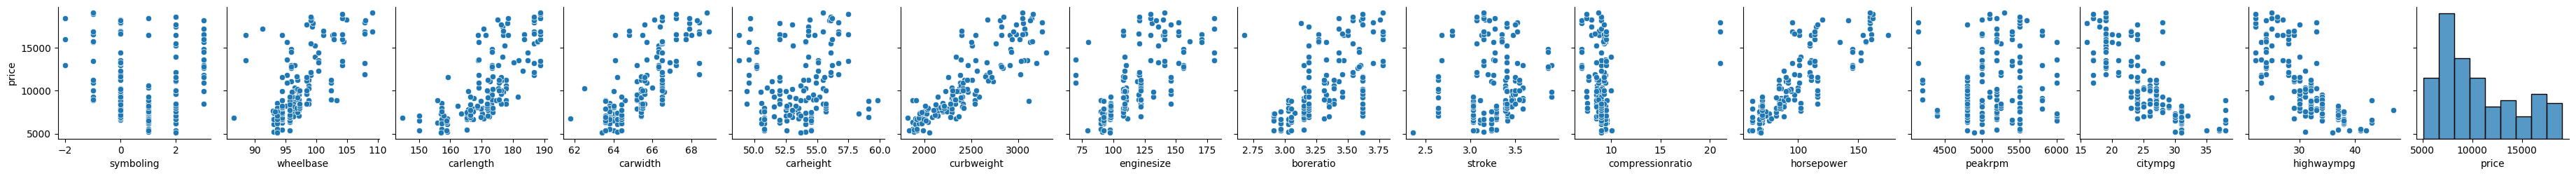

In [264]:
sns.pairplot(data.to_pandas(), y_vars=["price"])

# Categorical EDA

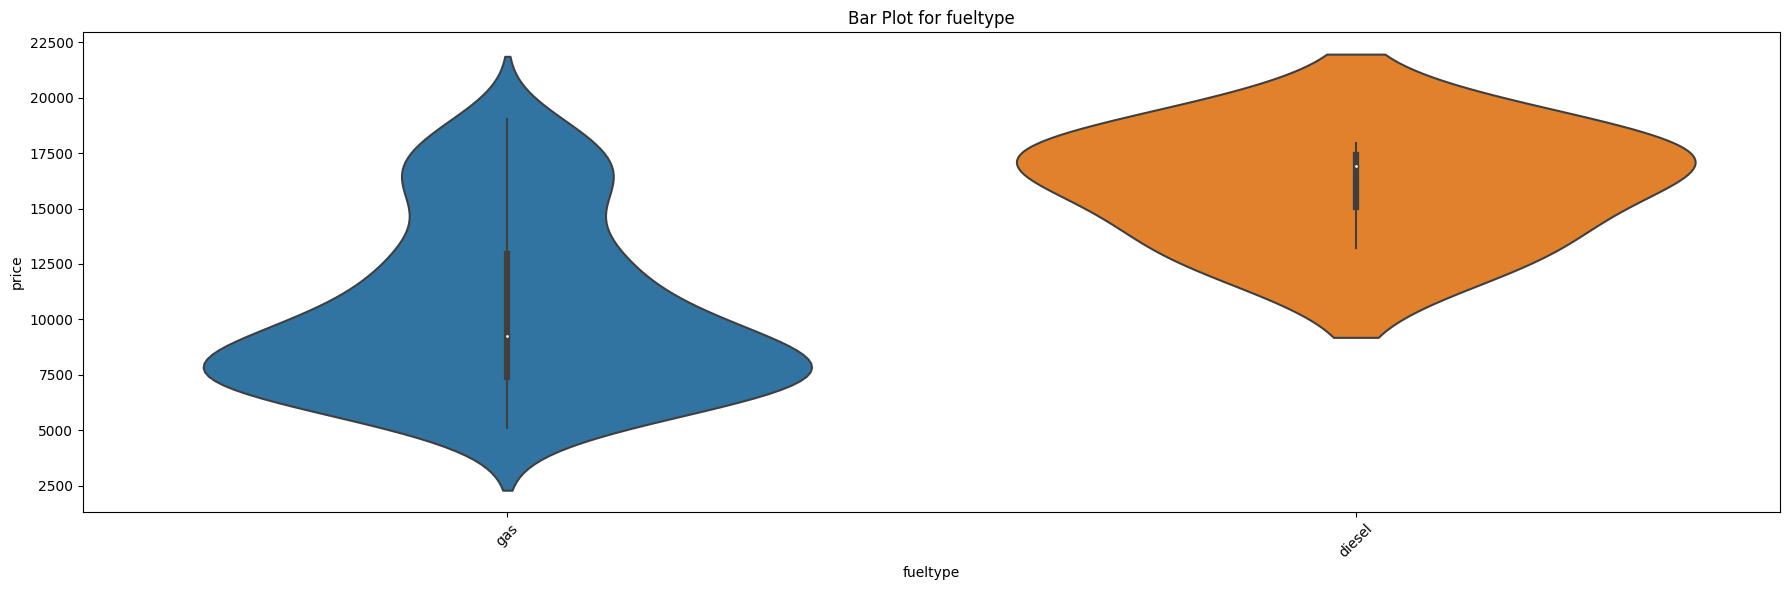

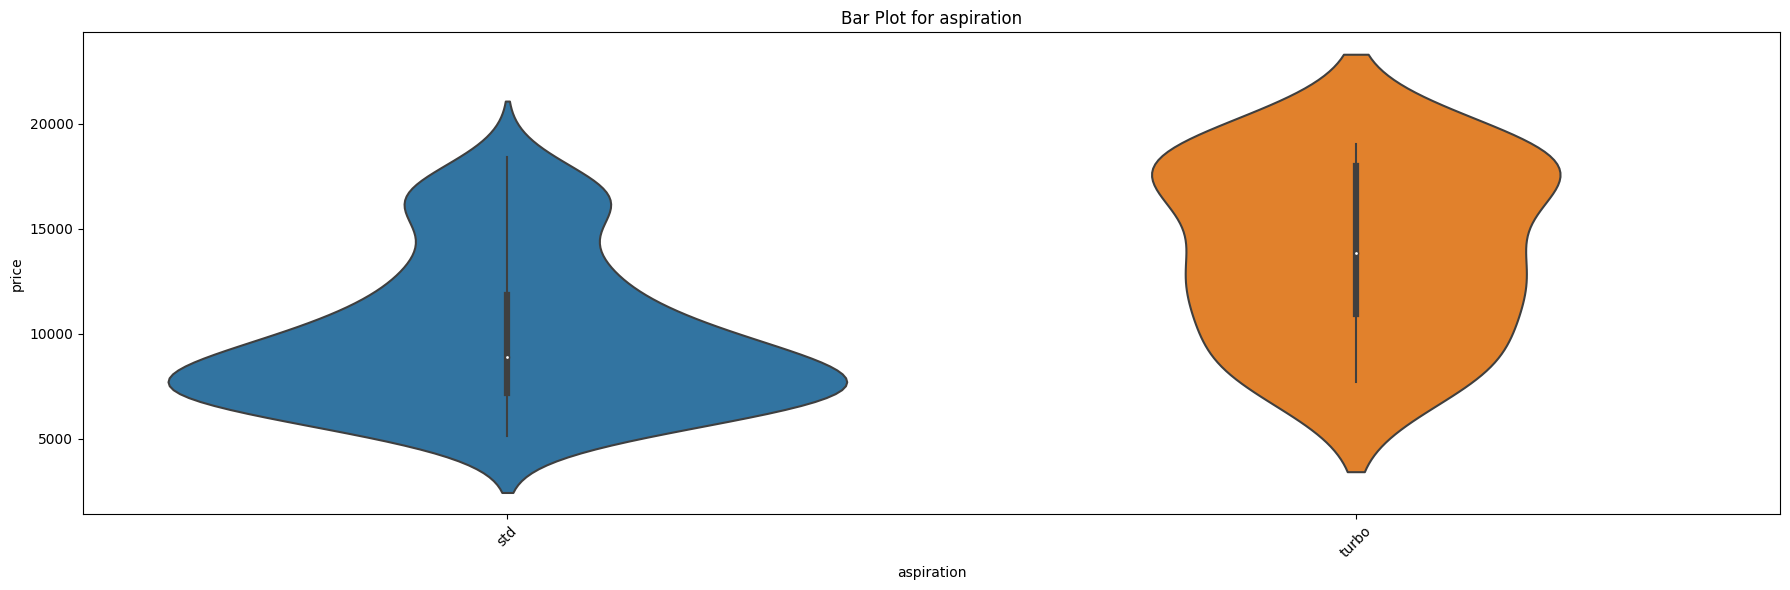

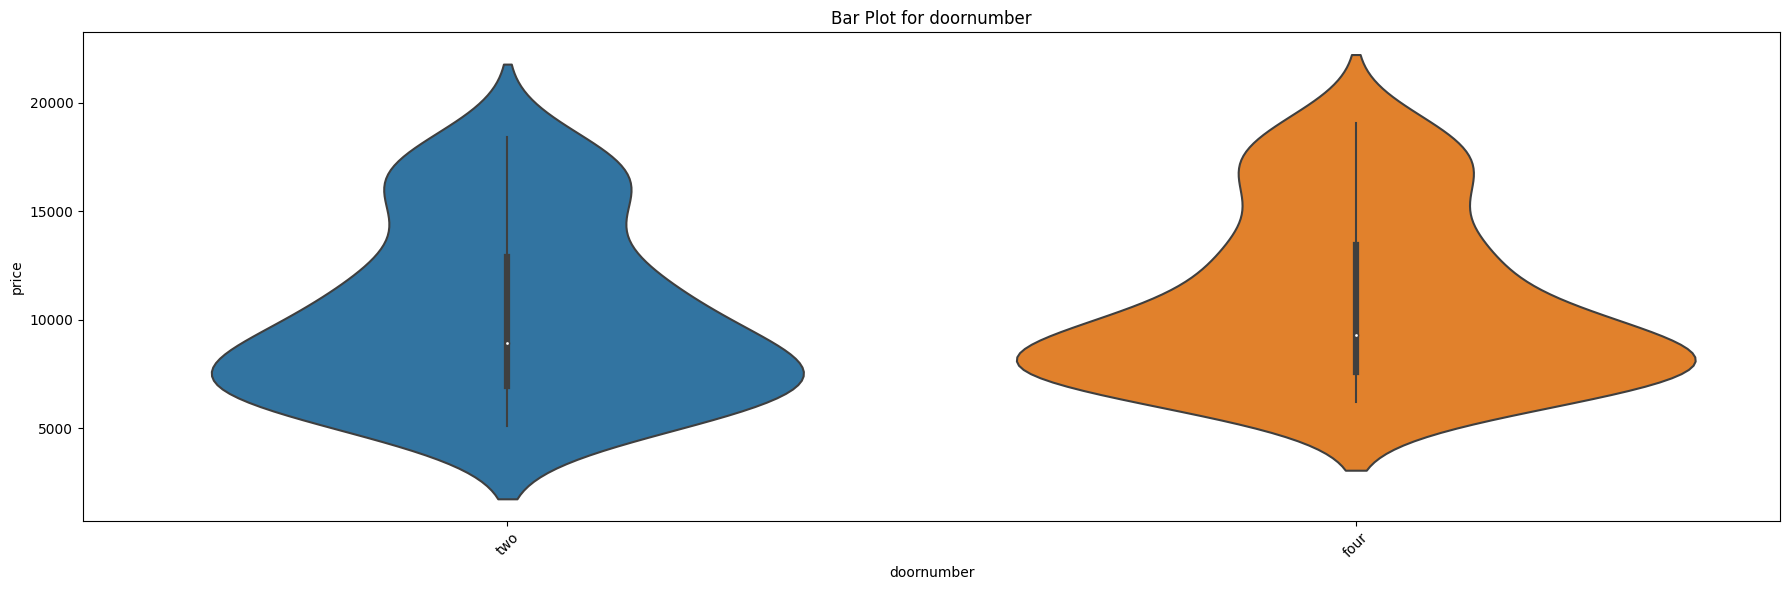

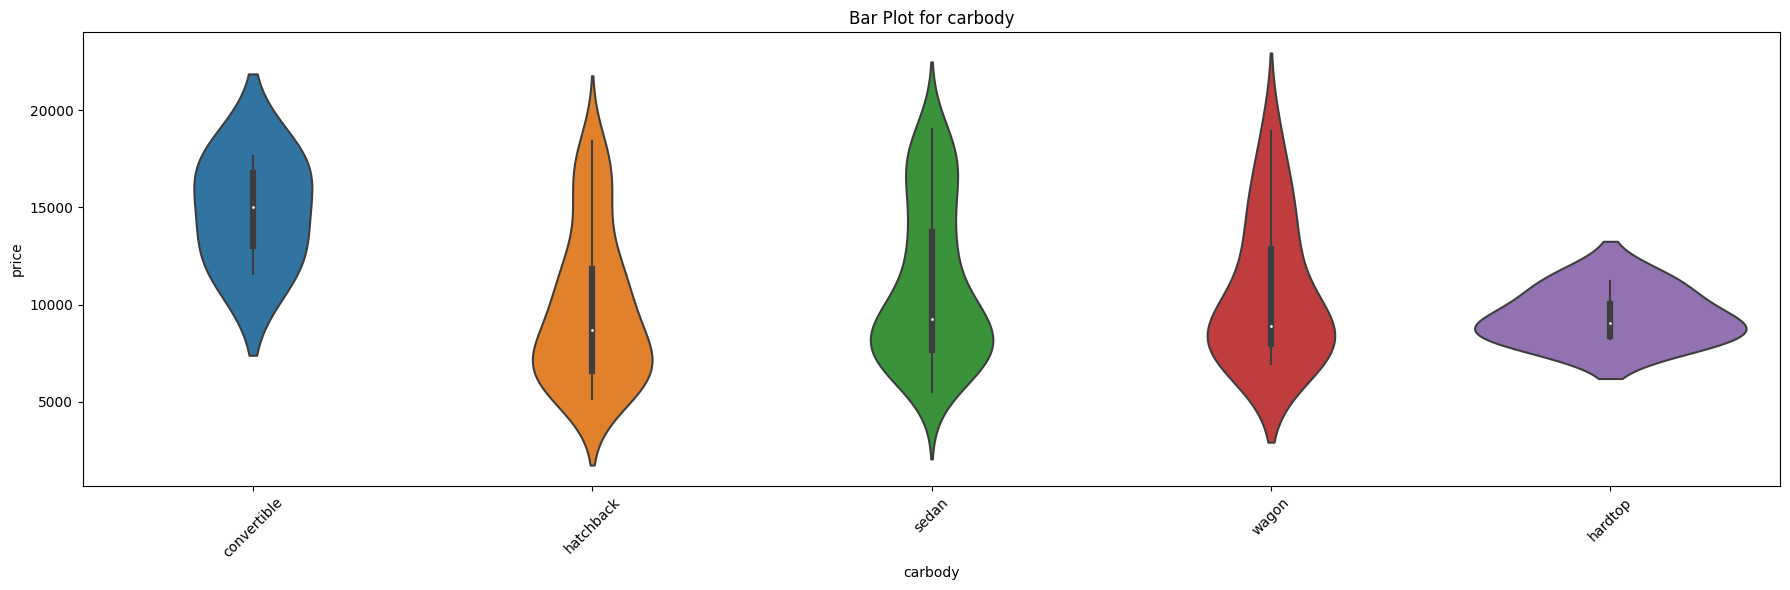

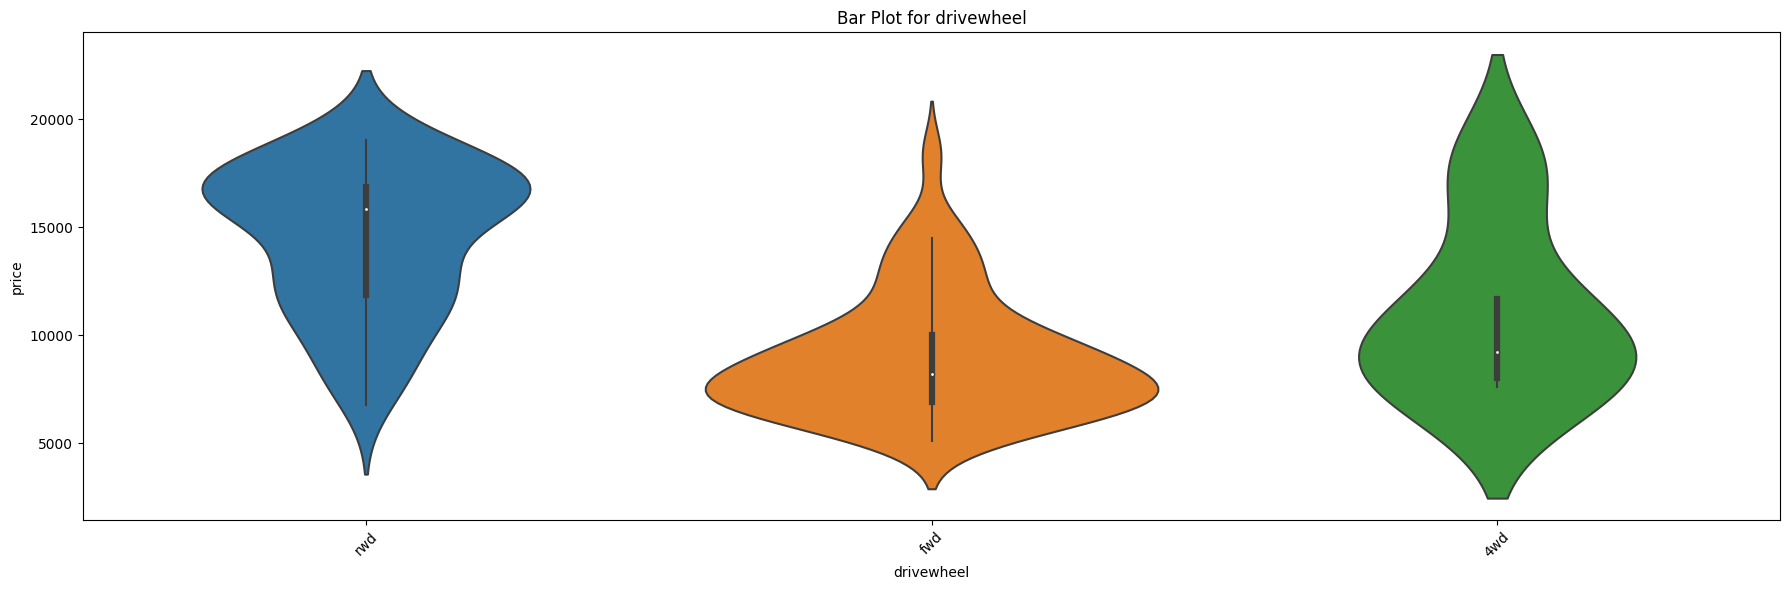

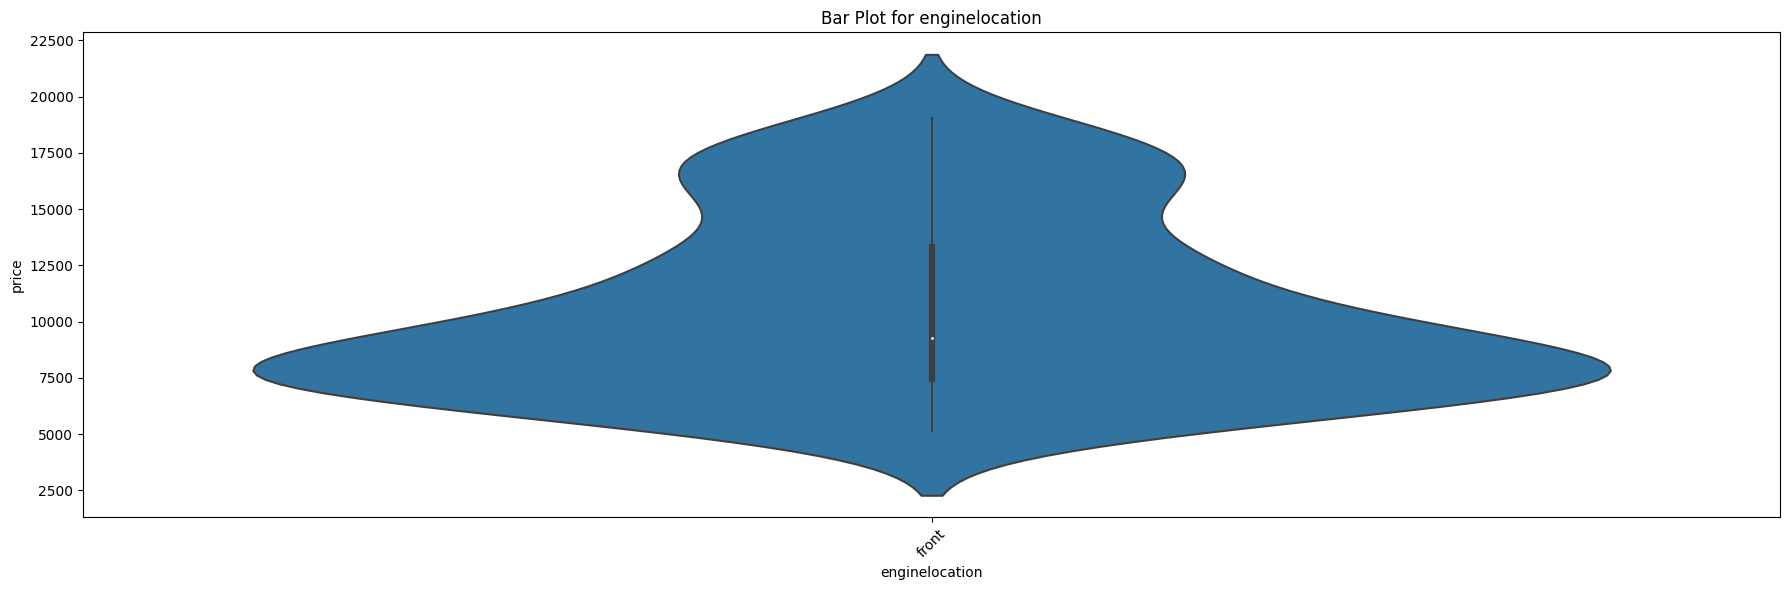

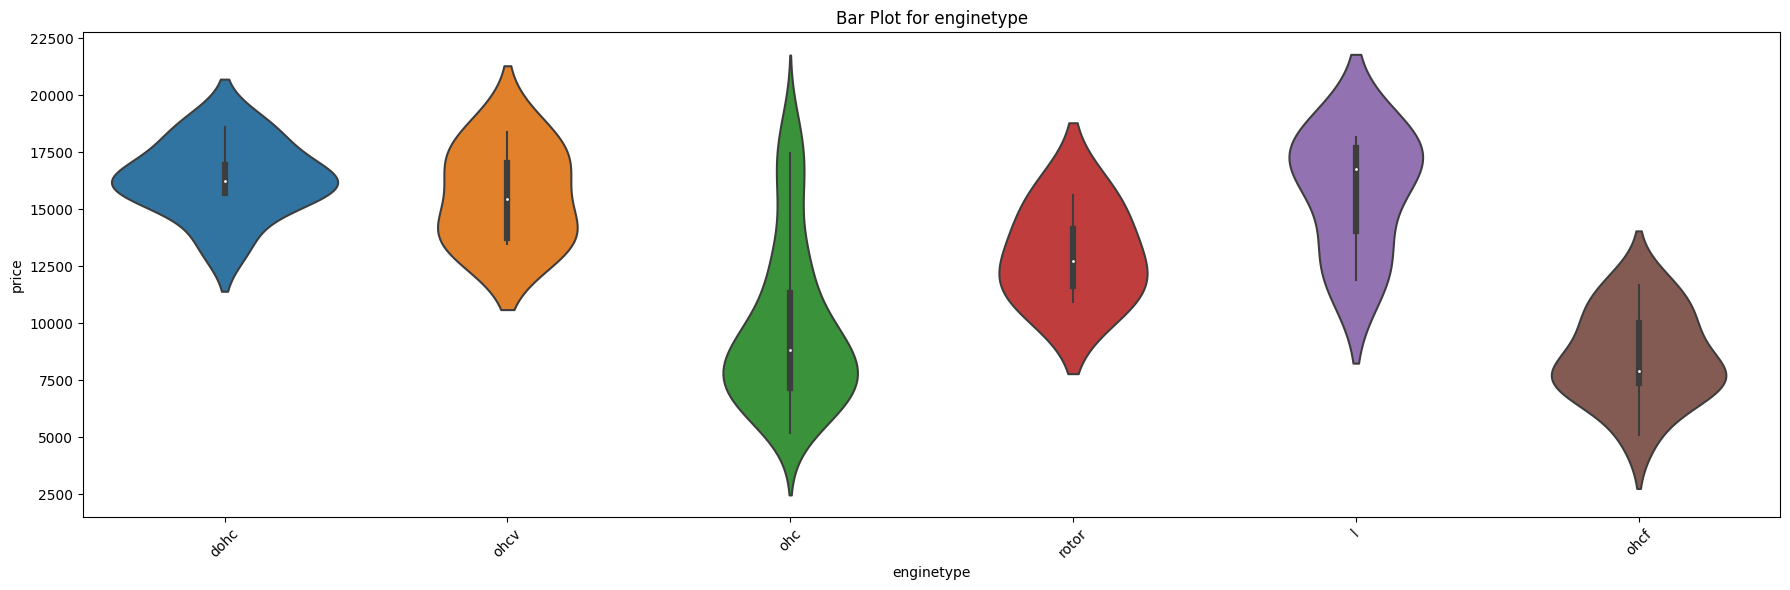

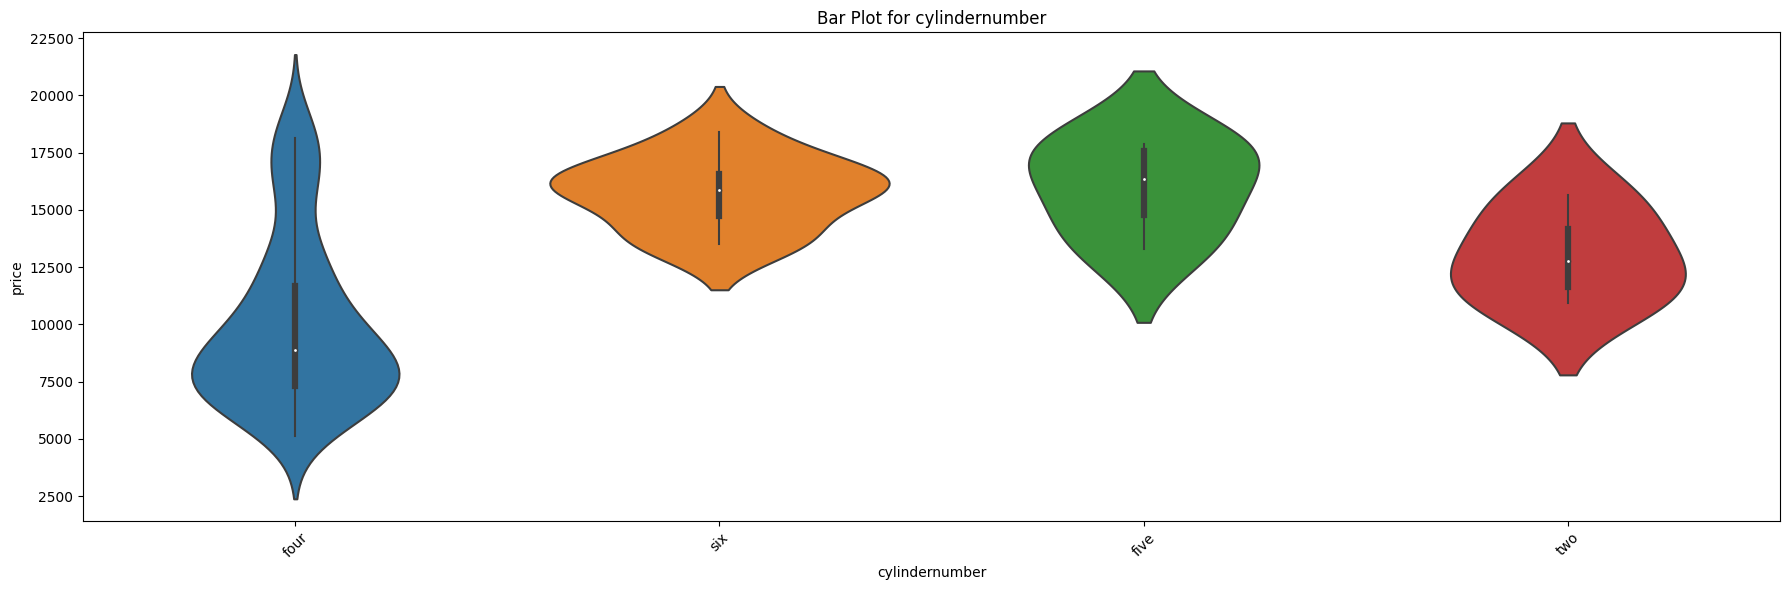

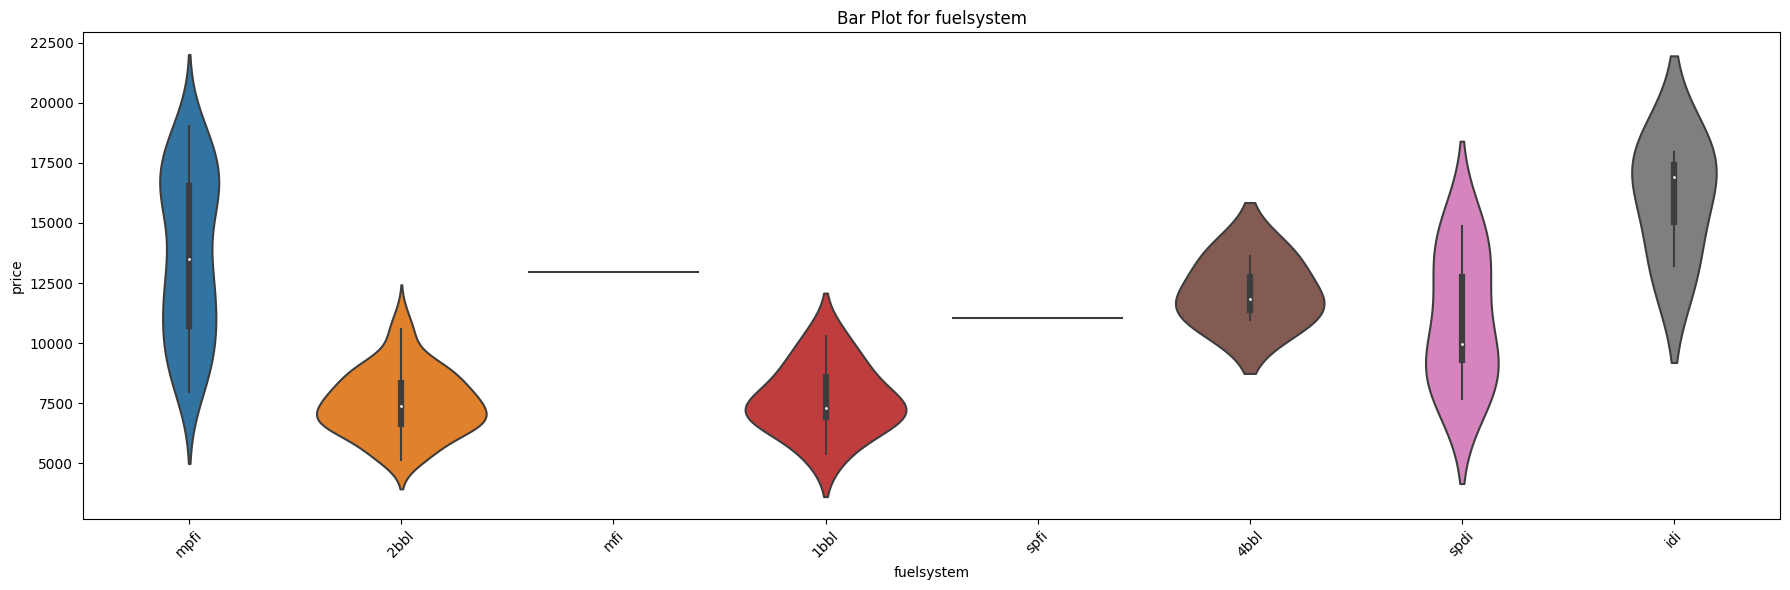

In [265]:
categorical_violin_plot(data.to_pandas(),cat_cols,"price")

In [266]:
for i in ["fueltype","aspiration","doornumber"]:
    print(data[i].value_counts())

shape: (2, 2)
┌──────────┬───────┐
│ fueltype ┆ count │
│ ---      ┆ ---   │
│ str      ┆ u32   │
╞══════════╪═══════╡
│ diesel   ┆ 3     │
│ gas      ┆ 153   │
└──────────┴───────┘
shape: (2, 2)
┌────────────┬───────┐
│ aspiration ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ std        ┆ 132   │
│ turbo      ┆ 24    │
└────────────┴───────┘
shape: (2, 2)
┌────────────┬───────┐
│ doornumber ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ two        ┆ 71    │
│ four       ┆ 85    │
└────────────┴───────┘


In [267]:
perform_ttest(data, "fueltype", "gas", "diesel","price")
perform_ttest(data, "aspiration", "std", "turbo","price")
perform_ttest(data, "doornumber", "two", "four","price")

T-statistic: -3.7790893105307823
P-value: 0.05492510733485611
There is no significant difference in price between gas and diesel for column 'fueltype'.
T-statistic: -4.641213918535768
P-value: 6.457673385605879e-05
There is a significant difference in price between std and turbo for column 'aspiration'.
T-statistic: -0.999214485179234
P-value: 0.31932616255010365
There is no significant difference in price between two and four for column 'doornumber'.


Dropping Doornumber,engineLocation

In [268]:
data=data.drop("doornumber")
data=data.drop("enginelocation")
cat_cols.remove("doornumber")
cat_cols.remove("enginelocation")

Performing Kruskal-Walli test as data not following normal distribution

In [269]:
perform_non_normal_kruskal_hypothesis(data,cat_cols)


Kruskal-Wallis H-statistic: 4.8409130765317
P-value: 0.027792175891358756
There is a significant difference in prices between different fueltype categories.
Kruskal-Wallis H-statistic: 19.434570398187315
P-value: 1.0410547245971598e-05
There is a significant difference in prices between different aspiration categories.
Kruskal-Wallis H-statistic: 8.946100390920698
P-value: 0.06246092536783821
There is no significant difference in prices between different carbody categories.
Kruskal-Wallis H-statistic: 53.634669624179196
P-value: 2.2562097505284016e-12
There is a significant difference in prices between different drivewheel categories.
Kruskal-Wallis H-statistic: 39.74177027092525
P-value: 1.6835558389934766e-07
There is a significant difference in prices between different enginetype categories.
Kruskal-Wallis H-statistic: 25.88184607695836
P-value: 1.009640364964762e-05
There is a significant difference in prices between different cylindernumber categories.
Kruskal-Wallis H-statistic: 

Significant enough to reject NULL Hypothesis of No impact of change to dependent variable

In [270]:
data=data.with_columns(data["cylindernumber"].str.replace_many(["two","three","four","five","six","eight","twelve"],["2","3","4","5","6","8","12"]).cast(pl.Int64))
data=data.with_columns(data["fuelsystem"].is_in(["mpfi","idi"]).cast(pl.Int64))
data=data.with_columns(data["fueltype"].is_in(["diesel"]).cast(pl.Int64))
data=data.with_columns(data["enginetype"].is_in(["ohc","ohcf"]).cast(pl.Int64))
cat_cols.remove("cylindernumber")
cat_cols.remove("fuelsystem")
cat_cols.remove("enginetype")
cat_cols.remove("fueltype")
num_cols.append("fueltype")
num_cols.append("cylindernumber")
num_cols.append("enginetype")
num_cols.append("fuelsystem")

In [271]:
for i in cat_cols:
    print(data[i].value_counts())

shape: (2, 2)
┌────────────┬───────┐
│ aspiration ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ std        ┆ 132   │
│ turbo      ┆ 24    │
└────────────┴───────┘
shape: (5, 2)
┌─────────────┬───────┐
│ carbody     ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ hardtop     ┆ 4     │
│ convertible ┆ 4     │
│ wagon       ┆ 19    │
│ sedan       ┆ 67    │
│ hatchback   ┆ 62    │
└─────────────┴───────┘
shape: (3, 2)
┌────────────┬───────┐
│ drivewheel ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ fwd        ┆ 105   │
│ 4wd        ┆ 9     │
│ rwd        ┆ 42    │
└────────────┴───────┘


One hot encoding remaining categorical Variables

# Numerical eda

In [272]:
data[num_cols]

symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype,cylindernumber,enginetype,fuelsystem
i64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i64,i64,i64,i64,f64,i64,i64,i64,i64
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,4,0,1
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,4,0,1
1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,6,0,1
2,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950.0,0,4,1,1
2,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450.0,0,5,1,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-1,104.3,188.8,67.2,57.5,3042,141,3.78,3.15,9.5,114,5400,24,28,16515.0,0,4,1,1
-2,104.3,188.8,67.2,56.2,3045,130,3.62,3.15,7.5,162,5100,17,22,18420.0,0,4,1,1
-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0,0,4,1,1


Univariate Analysis

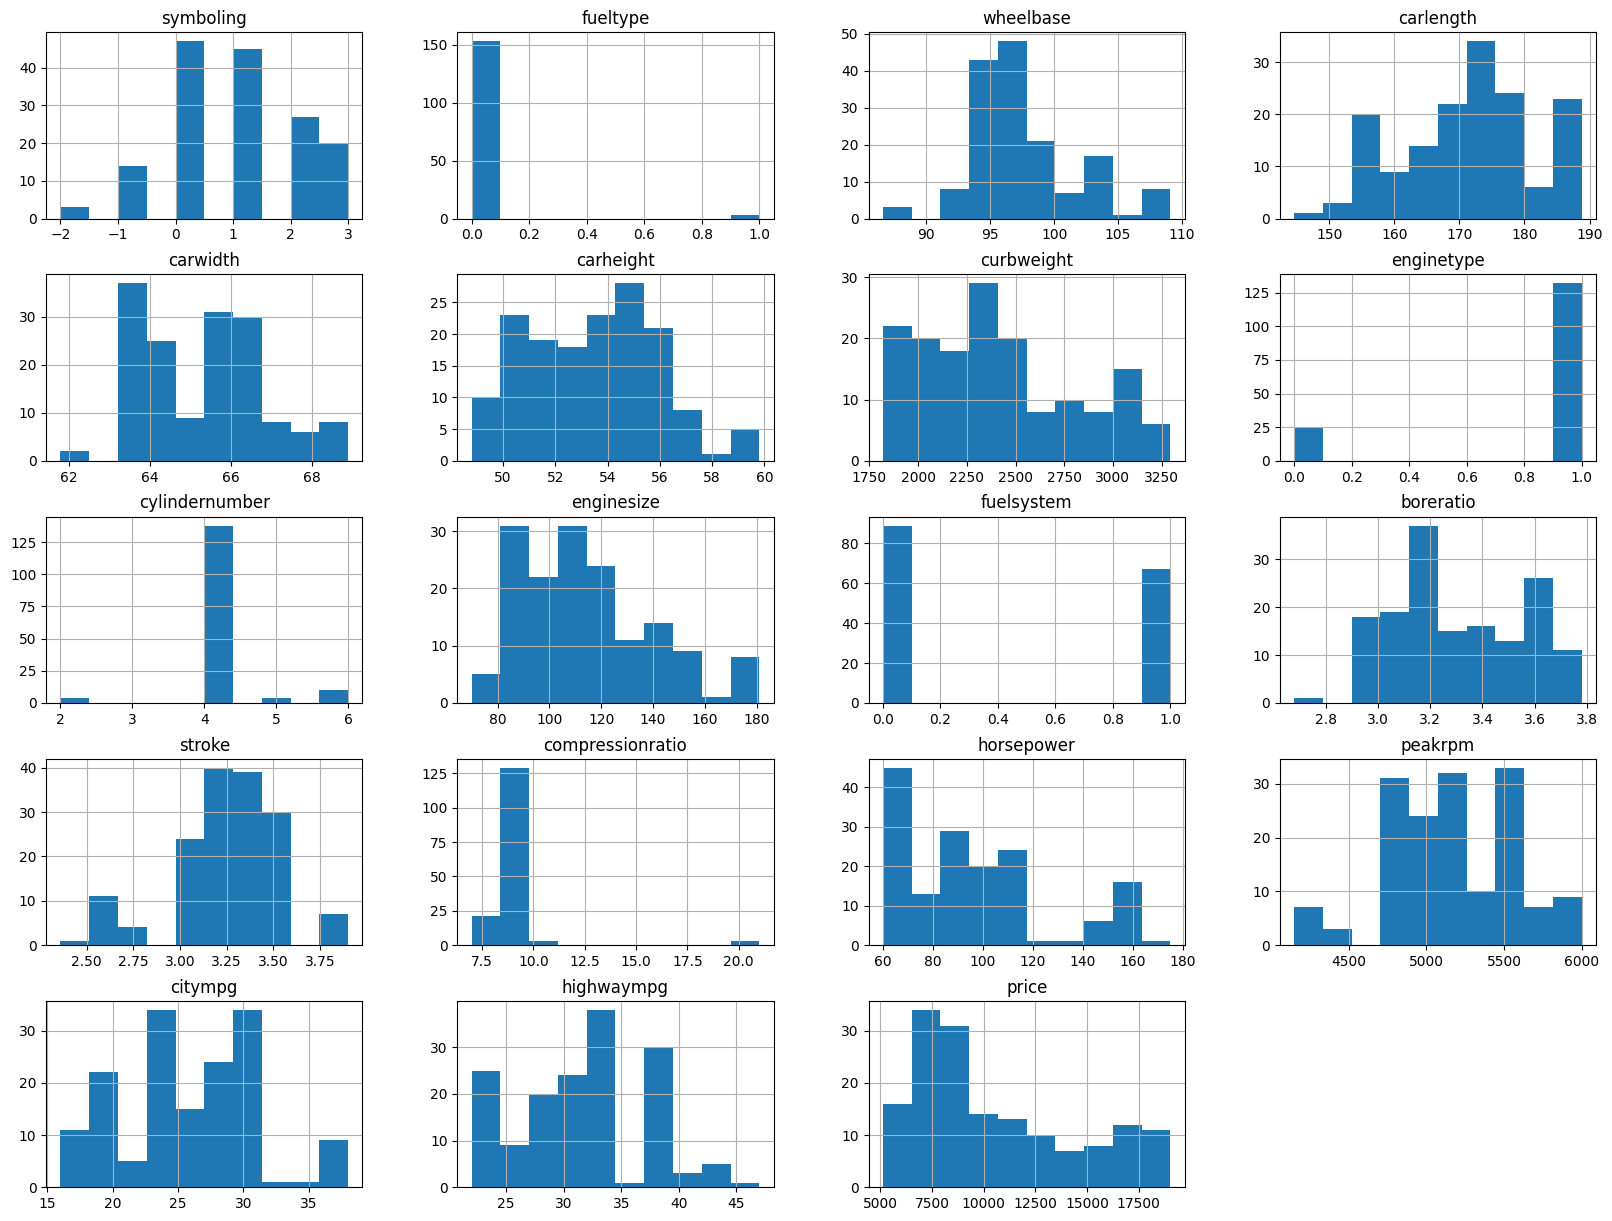

In [273]:
data.to_pandas().hist(bins=10,figsize=(20,15))
plt.show()

Bivariate Analysis

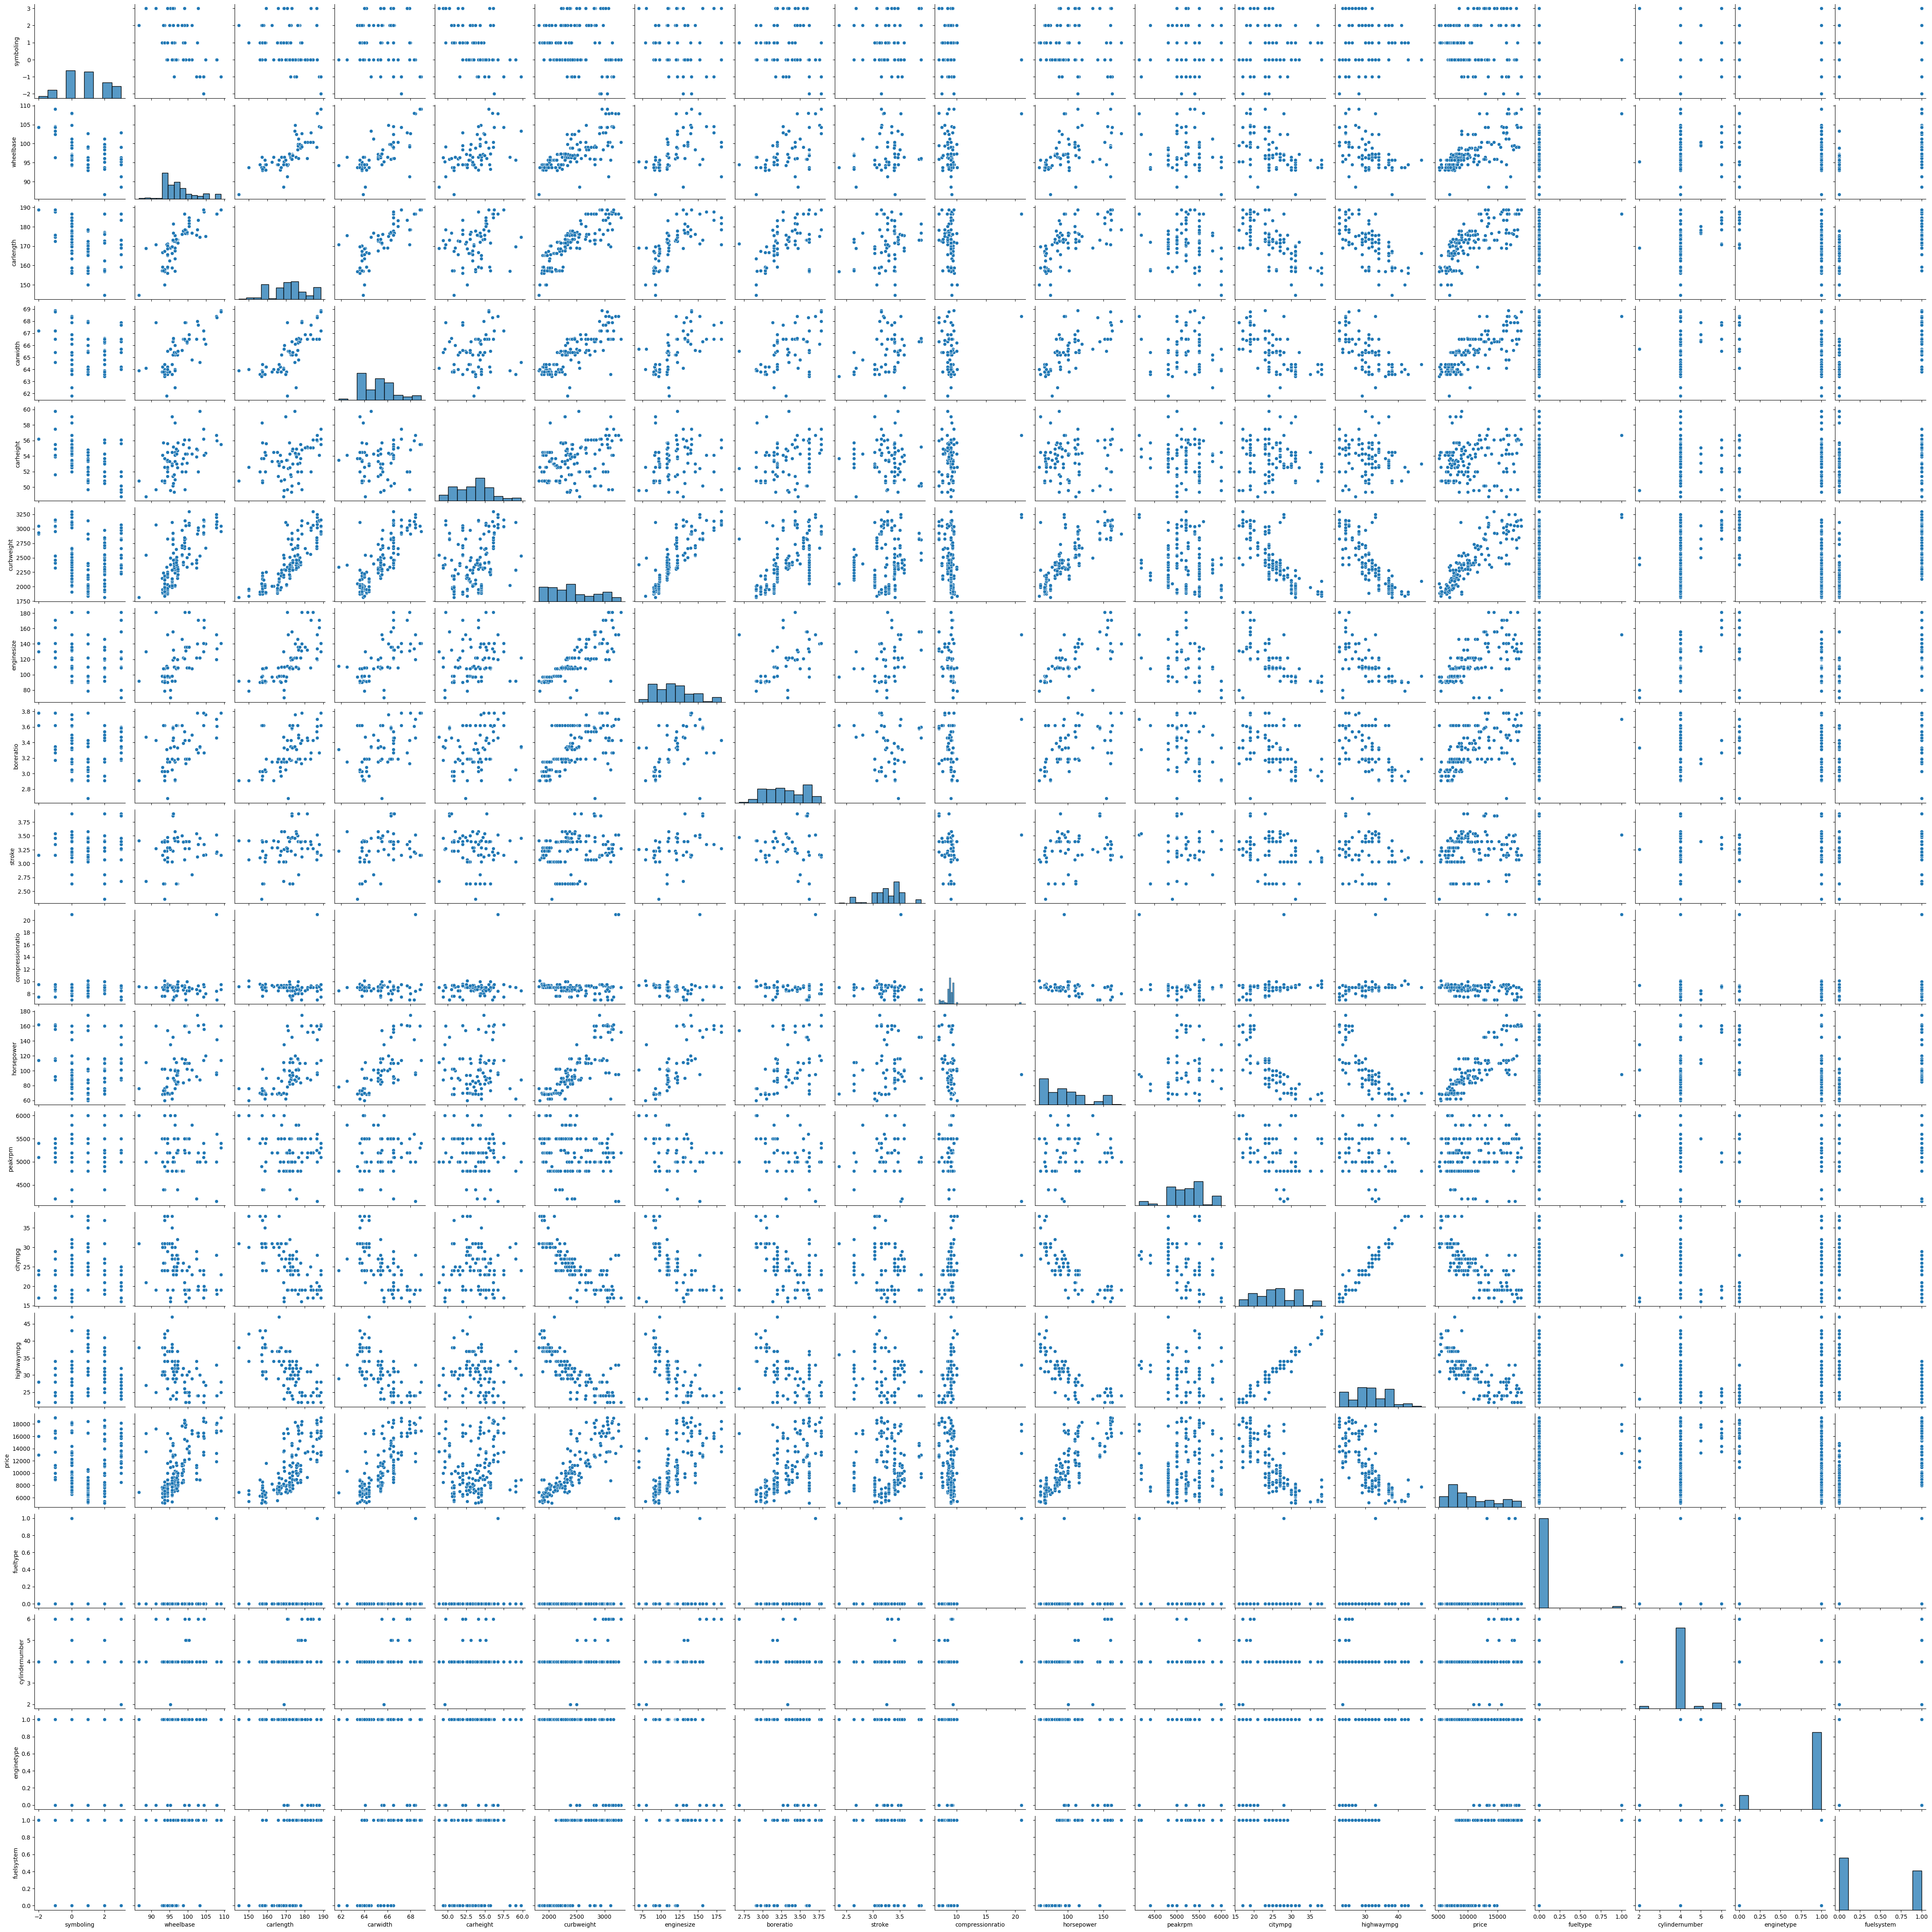

In [274]:
sns.pairplot(data[num_cols].to_pandas(),y_vars=num_cols)

<AxesSubplot: >

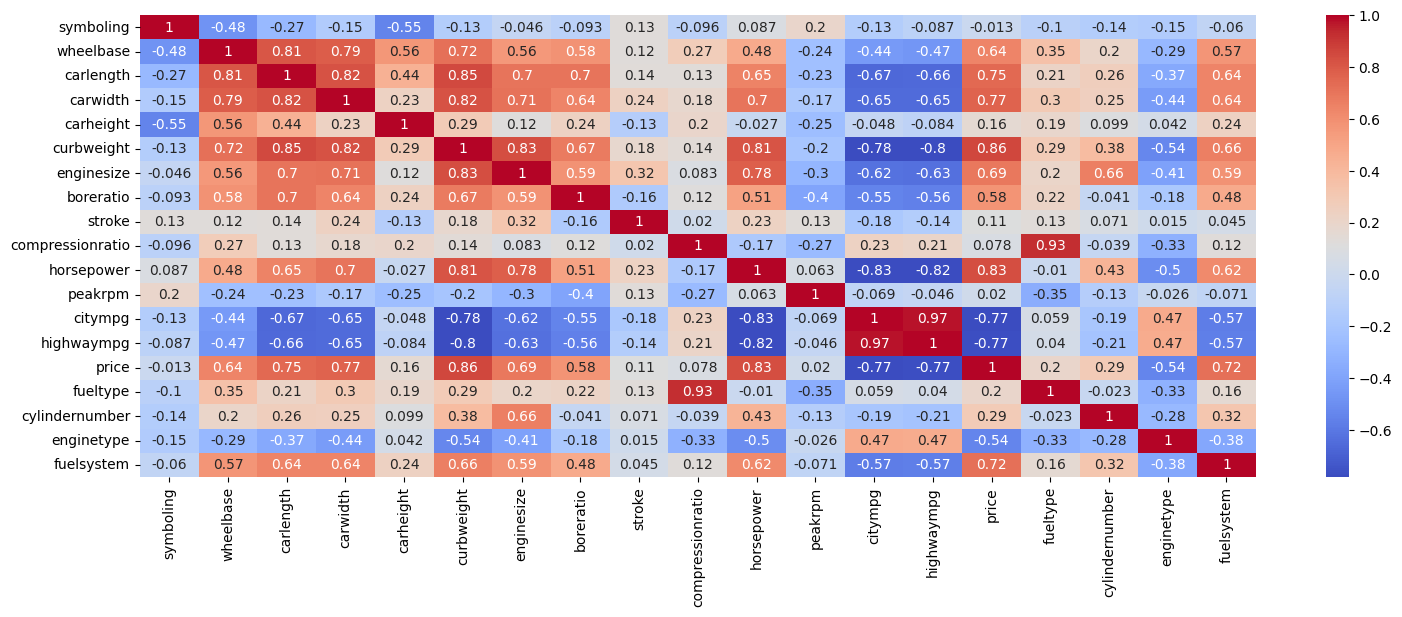

In [275]:
plt.figure(figsize=(18,6))
sns.heatmap(data[num_cols].to_pandas().corr(),annot=True,cmap="coolwarm",robust=True)

Feature Engineering

In [276]:
data=data.with_columns(((data["highwaympg"]+data["citympg"])/2).alias("averagempg")).drop(["highwaympg","citympg"])
num_cols.remove("citympg")
num_cols.remove("highwaympg")
num_cols.append("averagempg")

In [277]:
cols=['wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio', 'horsepower', 'price', 'fuelsystem', 'averagempg']
drop=[col for col in num_cols if col not in cols]
num_cols=cols

In [278]:
data=data.drop(drop)
data

aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,price,averagempg
str,str,str,f64,f64,f64,i64,i64,i64,f64,i64,f64,f64
"""std""","""convertible""","""rwd""",88.6,168.8,64.1,2548,130,1,3.47,111,13495.0,24.0
"""std""","""convertible""","""rwd""",88.6,168.8,64.1,2548,130,1,3.47,111,16500.0,24.0
"""std""","""hatchback""","""rwd""",94.5,171.2,65.5,2823,152,1,2.68,154,16500.0,22.5
"""std""","""sedan""","""fwd""",99.8,176.6,66.2,2337,109,1,3.19,102,13950.0,27.0
"""std""","""sedan""","""4wd""",99.4,176.6,66.4,2824,136,1,3.19,115,17450.0,20.0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""std""","""wagon""","""rwd""",104.3,188.8,67.2,3042,141,1,3.78,114,16515.0,26.0
"""turbo""","""sedan""","""rwd""",104.3,188.8,67.2,3045,130,1,3.62,162,18420.0,19.5
"""turbo""","""wagon""","""rwd""",104.3,188.8,67.2,3157,130,1,3.62,162,18950.0,19.5


In [279]:
data["drivewheel"].value_counts()

drivewheel,count
str,u32
"""rwd""",42
"""4wd""",9
"""fwd""",105


In [280]:
data=data.to_dummies(columns=cat_cols).drop(["aspiration_turbo","carbody_convertible","drivewheel_4wd"])
data.write_csv("../Day2/processed.csv")

## Performing OverSample Since Some Categorical variables are very low to split or cv

In [281]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
df=data.sample(1000,with_replacement=True)
lr.fit(df.drop("price"),df["price"])

LinearRegression()

In [282]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr, df.drop("price"),df["price"], cv=10, scoring='r2', return_train_score=True)

print(f'Test Scores: {cv_results["test_score"]}')
print(f'Training Scores: {cv_results["train_score"]}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')
print(f'Mean Fit Time: {cv_results["fit_time"].mean()}')
print(f'Mean Score Time: {cv_results["score_time"].mean()}')

Test Scores: [0.89447464 0.8987097  0.82924752 0.8963568  0.8864859  0.84821269
 0.89691862 0.89907432 0.88720447 0.8473051 ]
Training Scores: [0.88468816 0.88414337 0.89050629 0.88451611 0.8856835  0.89002396
 0.88474373 0.88423845 0.88548038 0.88990219]
Mean Test Score: 0.8783989766213424
Standard Deviation of Test Scores: 0.024901255015462545
Mean Fit Time: 0.0016408920288085937
Mean Score Time: 0.0007174015045166016


In [283]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test = train_test_split(df.drop("price"),df["price"],test_size=0.25)
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
print(r2_score(Y_test,pred))

0.8873403915071495


In [284]:
from statsmodels.api import OLS
ols=OLS(df["price"].to_pandas(),df.drop(["price"]).to_pandas()).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              4271.
Date:                Mon, 20 May 2024   Prob (F-statistic):                        0.00
Time:                        00:38:43   Log-Likelihood:                         -8621.9
No. Observations:                1000   AIC:                                  1.728e+04
Df Residuals:                     984   BIC:                                  1.735e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
aspiration_std      205.8089    172.673      1.192      0.234    -133.042     544.659
carbody_hardtop   -5250.5049    392.572    -13.375      0.000   -6020.879   -4480.131
carbody_hatchback -2683.2834    289.509     -9.268      0.000   -3251.409   -2115.158
carbody_sedan     -2169.7544    299.812     -7.237      0.000   -2758.099   -1581.409
carbody_wagon     -3359.8492    334.477    -10.045      0.000   -4016.219   -2703.479
drivewheel_fwd     -323.3372    215.173     -1.503      0.133    -745.588      98.914
drivewheel_rwd      610.0261    225.004      2.711      0.007     168.483    1051.570
wheelbase            45.3929     22.272      2.038      0.042       1.686      89.100
carlength            13.8569     12.158      1.140      0.255     -10.002      37.716
carwidth            -77.6147     37.077     -2.093      0.037    -150.374      -4.855
curbweight            4.6948      0.428     10.963      0.000       3.854       5.535
enginesize          -37.8393      4.373     -8.653      0.000     -46.421     -29.258
fuelsystem         1252.3965    134.624      9.303      0.000     988.212    1516.581
boreratio          -334.8543    270.309     -1.239      0.216    -865.302     195.593
horsepower           58.8258      4.340     13.554      0.000      50.309      67.343
averagempg          -29.1323     18.630     -1.564      0.118     -65.692       7.427
==============================================================================
Omnibus:                       26.277   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.688
Skew:                           0.330   Prob(JB):                     2.17e-07
Kurtosis:                       3.548   Cond. No.                     3.39e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Will treat Multicollinearity use norms in other notebook

In [285]:
from sklearn.metrics import r2_score

def get_metrics(X,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    return r2,adjusted_r2
y_pred = ols.predict(X_test)
get_metrics(X_test,Y_test,y_pred)

(0.887710123954478, 0.8799992311788198)

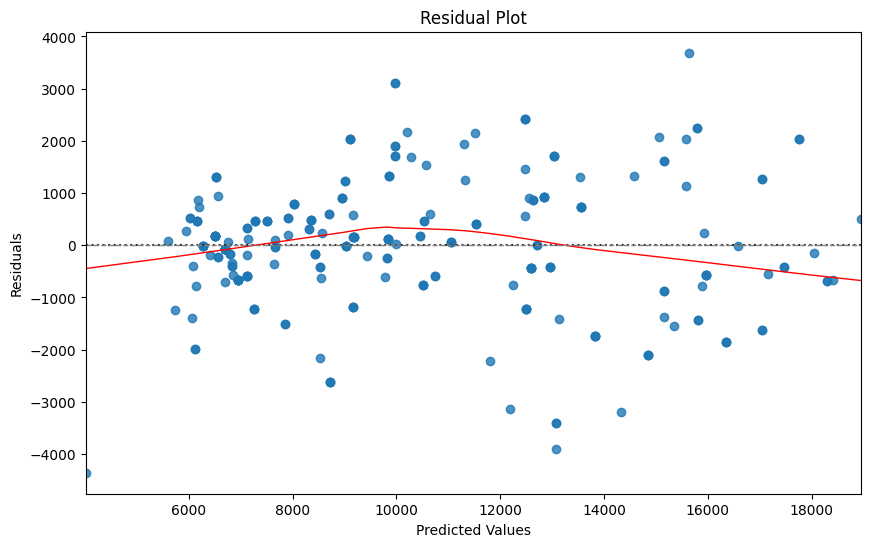

In [286]:
plt.figure(figsize=(10, 6))
residuals=y_pred-Y_test
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)
plt.show()

### HeteroSkedasticity Not Following little bit

<AxesSubplot: ylabel='Count'>

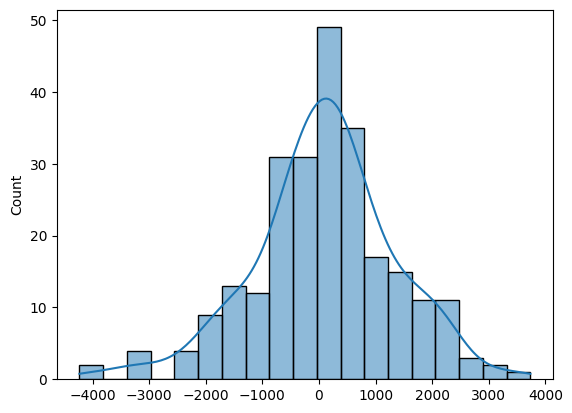

In [287]:
sns.histplot(residuals,kde=True)

<Figure size 1000x600 with 0 Axes>

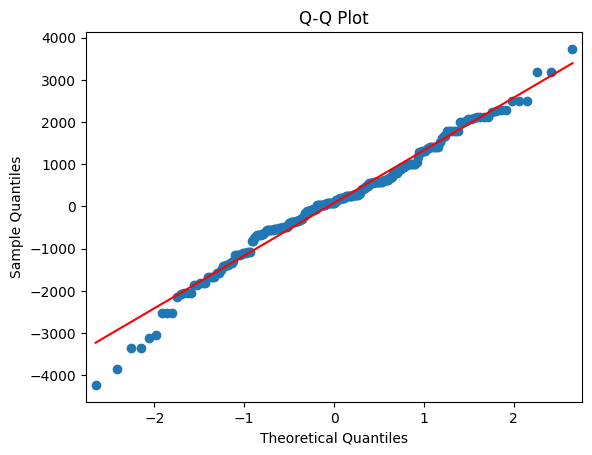

In [288]:
import statsmodels.api as sm
# Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Residual deviating from normal at tails